# Onderzoek googletrends alcoholgebruik data en obesitas.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cbsodata
import time

# openstreetmap API package
# can be installed in conda cmd with:
# conda config --prepend channels conda-forge
# conda create -n ox --strict-channel-priority osmnx
import osmnx as ox



### pak alle gemeenten in nederland met obesitas data.

In [2]:
gemeenten_df = pd.read_csv('data/gemeenten_nl.csv')
gemeenten_df.pop('Unnamed: 0')
gemeenten_df.head()

,RegioS
0,Aa en Hunze
1,Aalsmeer
2,Aalten
3,Achtkarspelen
4,Alblasserdam


maak een lijst met alle gemeenten + ', Nederland' om de gemeentes op te zoeken in Openstreetmap.

In [3]:
places = []

for gemeente in gemeenten_df['RegioS']:
    places.append(str(gemeente) + ', Nederland')

### pak openstreetmaps bar data.

In [4]:
# kies tags om naar te zoeken. dit zijn alle klasses waar je drank kan kopen.
tags = {'amenity': ['pub', 'bar', 'biergarten']}

In [5]:
# lijst om het aantal bars in op te slaan.
n_bars = []

# loop door lijst met gemeente search query's en pak de bar data van de gemeenten.
i = 0
while i < len(places):
    print(places[i])
    # pakt bar data
    bars = ox.geometries.geometries_from_place(places[i], tags)
    # pak het aantal bars
    n_bars.append(len(bars))
    i += 1
    

Aa en Hunze, Nederland
Aalsmeer, Nederland
Aalten, Nederland
Achtkarspelen, Nederland
Alblasserdam, Nederland
Albrandswaard, Nederland
Alkmaar, Nederland
Almelo, Nederland
Almere, Nederland
Alphen aan den Rijn, Nederland
Alphen-Chaam, Nederland
Altena, Nederland
Ameland, Nederland
Amersfoort, Nederland
Amstelveen, Nederland
Amsterdam, Nederland
Apeldoorn, Nederland
Arnhem, Nederland
Assen, Nederland
Asten, Nederland
Baarle-Nassau, Nederland
Baarn, Nederland
Barendrecht, Nederland
Barneveld, Nederland
Beek (L.), Nederland
Beekdaelen, Nederland
Beemster, Nederland
Beesel, Nederland
Berg en Dal, Nederland
Bergeijk, Nederland
Bergen (L.), Nederland
Bergen (NH.), Nederland
Bergen op Zoom, Nederland
Berkelland, Nederland
Bernheze, Nederland
Best, Nederland
Beuningen, Nederland
Beverwijk, Nederland
De Bilt, Nederland
Bladel, Nederland
Blaricum, Nederland
Bloemendaal, Nederland
Bodegraven-Reeuwijk, Nederland
Boekel, Nederland
Borger-Odoorn, Nederland
Borne, Nederland
Borsele, Nederland
Boxmeer

In [6]:
# voegt de bar data toe aan de gemeente dataframe.
gemeenten_df['n_bars'] = n_bars

display(gemeenten_df)

,RegioS,n_bars
0,Aa en Hunze,5
1,Aalsmeer,3
2,Aalten,2
3,Achtkarspelen,2
4,Alblasserdam,1
...,...,...
338,Zundert,10
339,Zutphen,16
340,Zwartewaterland,3
341,Zwijndrecht,4


### pak de populatie en bevolkingsdichtheid data om het aantal bars in een gemeente in verhouding te brengen.

In [7]:
populatie_df = pd.read_csv('data/populatie_gemeenten.csv')
gemeenten_df[['populatie', 'pop_dichtheid']] = populatie_df[['aantal', 'bevolkings_dichtheid']]
display(gemeenten_df)

,RegioS,n_bars,populatie,pop_dichtheid
0,Aa en Hunze,5,25399,92.6
1,Aalsmeer,3,31991,1612.6
2,Aalten,2,27120,280.7
3,Achtkarspelen,2,27900,273.5
4,Alblasserdam,1,20136,2288.5
...,...,...,...,...
338,Zundert,10,21988,184.5
339,Zutphen,16,48111,1180.1
340,Zwartewaterland,3,22823,279.0
341,Zwijndrecht,4,44775,2205.5


het aantal bars delen door de populatie per gemeente.

In [8]:
# lijst om nieuwe bar data in te bewaren
bar_pop = []

for ind_r, row_b in gemeenten_df.iterrows(): 
    if row_b['n_bars'] != 0:
        # deel populatie door het aantal bars
        bar_pop.append(row_b['n_bars'] / int(row_b['populatie']))
    else:
        # print de gemeenten zonder bars ter info
        print(row_b['RegioS'])
        bar_pop.append(row_b['populatie'])

gemeenten_df['bar_pop'] = bar_pop

Blaricum
Borne
Brummen
Eemnes
Gennep
Heerhugowaard
Hendrik-Ido-Ambacht
Krimpen aan den IJssel
Mook en Middelaar
Nederweert
Opmeer
Pekela
Ridderkerk
Rozendaal
Sint Anthonis
Someren
Voorst
Westerwolde


het aantal bars delen door bevolkingsdichtheid per gemeente.

In [9]:
# lijst om nieuwe bar data in te bewaren
bar_dhd = []

for ind_r, row_b in gemeenten_df.iterrows(): 

    if row_b['n_bars'] != 0:
        # deel bevolkingsdichtheid door het aantal bars
        bar_dhd.append(row_b['n_bars'] / int(row_b['pop_dichtheid']))
    else:

        bar_dhd.append(row_b['pop_dichtheid'])

gemeenten_df['bar_dhd'] = bar_dhd

### normaliseer de berekende data

In [10]:
# normaliseer populatie gedeeld door bars.
mx = max(gemeenten_df['bar_pop'])
bar_pop = [float(i)/mx for i in gemeenten_df['bar_pop']]
# normaliseer bevolkingsdichtheid gedeeld door bars.
mx = max(gemeenten_df['bar_dhd'])
bar_dhd = [float(i)/mx for i in gemeenten_df['bar_dhd']]

In [11]:
# data opslaan in dataframe.
gemeenten_df['bar_pop'] = bar_pop
gemeenten_df['bar_dhd'] = bar_dhd
display(gemeenten_df)

,RegioS,n_bars,populatie,pop_dichtheid,bar_pop,bar_dhd
0,Aa en Hunze,5,25399,92.6,3.371609e-09,1.420784e-05
1,Aalsmeer,3,31991,1612.6,1.606117e-09,4.865215e-07
2,Aalten,2,27120,280.7,1.263060e-09,1.867316e-06
3,Achtkarspelen,2,27900,273.5,1.227749e-09,1.915196e-06
4,Alblasserdam,1,20136,2288.5,8.505711e-10,1.142588e-07
...,...,...,...,...,...,...
338,Zundert,10,21988,184.5,7.789294e-09,1.420784e-05
339,Zutphen,16,48111,1180.1,5.695862e-09,3.544735e-06
340,Zwartewaterland,3,22823,279.0,2.251295e-09,2.811013e-06
341,Zwijndrecht,4,44775,2205.5,1.530059e-09,4.742390e-07


### pak de gezondheids data van gemeenten om de correlatie te berekenen.

In [12]:
# laad data in.
gezondheids_monitor_df = pd.read_csv('data/Gezondheidsmonitor.csv')
display(gezondheids_monitor_df)

,Regio’s,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%)
0,Aa en Hunze,0.7,50.1,49.2,34.3,14.9,40.6,7.1,5.4
1,Aalsmeer,1.2,50.3,48.5,36.4,12.1,40.4,6.9,5.0
2,Aalten,1.4,49.2,49.4,33.8,15.6,41.3,11.7,6.6
3,Achtkarspelen,0.8,42.6,56.6,40.0,16.6,40.4,11.1,7.9
4,Alblasserdam,2.0,41.7,56.3,38.8,17.5,55.8,5.9,5.2
...,...,...,...,...,...,...,...,...,...
338,Zundert,0.8,44.4,54.8,38.4,16.4,36.6,11.7,8.5
339,Zutphen,1.7,50.6,47.7,32.6,15.1,46.5,7.6,5.0
340,Zwartewaterland,1.9,42.5,55.6,35.2,20.5,42.8,9.2,7.6
341,Zwijndrecht,2.1,41.2,56.7,37.3,19.3,48.6,6.2,5.6


In [13]:
# voeg data toe aan dataframe.
gezondheids_monitor_df[['n_bars', 'populatie', 'bar_pop', 'pop_dichtheid', 'bar_dhd']] = gemeenten_df[['n_bars', 'populatie', 'bar_pop', 'pop_dichtheid', 'bar_dhd']]
display(gezondheids_monitor_df)

,Regio’s,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_bars,populatie,bar_pop,pop_dichtheid,bar_dhd
0,Aa en Hunze,0.7,50.1,49.2,34.3,14.9,40.6,7.1,5.4,5,25399,3.371609e-09,92.6,1.420784e-05
1,Aalsmeer,1.2,50.3,48.5,36.4,12.1,40.4,6.9,5.0,3,31991,1.606117e-09,1612.6,4.865215e-07
2,Aalten,1.4,49.2,49.4,33.8,15.6,41.3,11.7,6.6,2,27120,1.263060e-09,280.7,1.867316e-06
3,Achtkarspelen,0.8,42.6,56.6,40.0,16.6,40.4,11.1,7.9,2,27900,1.227749e-09,273.5,1.915196e-06
4,Alblasserdam,2.0,41.7,56.3,38.8,17.5,55.8,5.9,5.2,1,20136,8.505711e-10,2288.5,1.142588e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Zundert,0.8,44.4,54.8,38.4,16.4,36.6,11.7,8.5,10,21988,7.789294e-09,184.5,1.420784e-05
339,Zutphen,1.7,50.6,47.7,32.6,15.1,46.5,7.6,5.0,16,48111,5.695862e-09,1180.1,3.544735e-06
340,Zwartewaterland,1.9,42.5,55.6,35.2,20.5,42.8,9.2,7.6,3,22823,2.251295e-09,279.0,2.811013e-06
341,Zwijndrecht,2.1,41.2,56.7,37.3,19.3,48.6,6.2,5.6,4,44775,1.530059e-09,2205.5,4.742390e-07


In [14]:
gezondheids_monitor_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_bars,populatie,bar_pop,pop_dichtheid,bar_dhd
Ondergewicht (%),1.000000,0.226497,-0.341771,-0.354774,-0.227313,-0.002847,-0.048274,0.006373,0.186005,0.189733,0.023996,0.252074,0.072893
Normaal gewicht (%),0.226497,1.000000,-0.992713,-0.813658,-0.857341,-0.348438,0.098440,0.226078,0.207087,0.186191,-0.077922,0.172821,-0.035891
Overgewicht (%),-0.341771,-0.992713,1.000000,0.828530,0.855497,0.336792,-0.089068,-0.218656,-0.221824,-0.202427,0.072384,-0.197767,0.025667
Matig overgewicht (%),-0.354774,-0.813658,0.828530,1.000000,0.419011,0.122884,0.028692,-0.050048,-0.290451,-0.307211,0.071628,-0.316816,0.024652
Ernstig overgewicht (obesitas) (%),-0.227313,-0.857341,0.855497,0.419011,1.000000,0.431288,-0.169288,-0.306887,-0.090720,-0.044416,0.051299,-0.028564,0.019806
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.002847,-0.348438,0.336792,0.122884,0.431288,1.000000,-0.703225,-0.642777,0.017238,0.122182,0.089320,0.257753,0.161866
Alcoholgebruik/Zware drinker (%),-0.048274,0.098440,-0.089068,0.028692,-0.169288,-0.703225,1.000000,0.768693,0.081251,-0.002946,-0.057138,-0.251788,-0.105320
Alcoholgebruik/Overmatig drinker (%),0.006373,0.226078,-0.218656,-0.050048,-0.306887,-0.642777,0.768693,1.000000,-0.001431,-0.094883,-0.050842,-0.232155,-0.059208
n_bars,0.186005,0.207087,-0.221824,-0.290451,-0.090720,0.017238,0.081251,-0.001431,1.000000,0.924553,-0.062819,0.417425,-0.046211
populatie,0.189733,0.186191,-0.202427,-0.307211,-0.044416,0.122182,-0.002946,-0.094883,0.924553,1.000000,-0.053647,0.496483,-0.038154


### bekijk bar_pop, populatie en %ernstige obesitas

In [15]:
import matplotlib.pyplot as plt

bar_pop barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

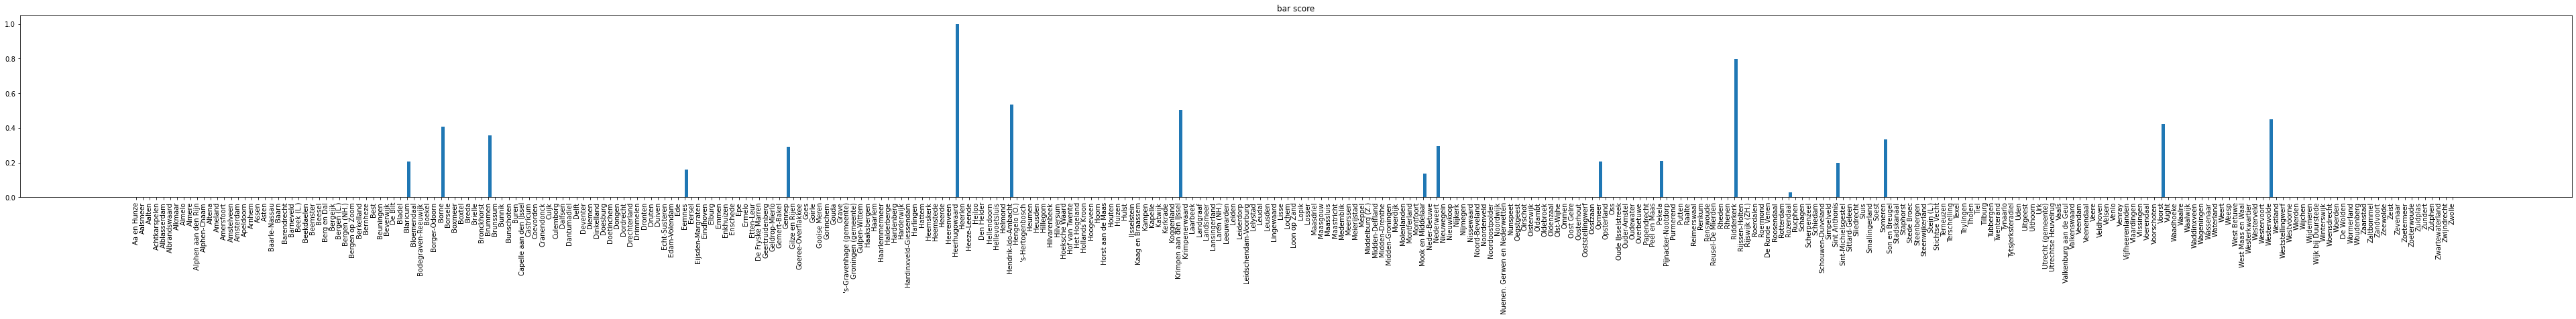

In [16]:
plt.figure(figsize=(150, 5))

plt.subplot(121)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["bar_pop"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("bar score")

plt.show

populatie barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

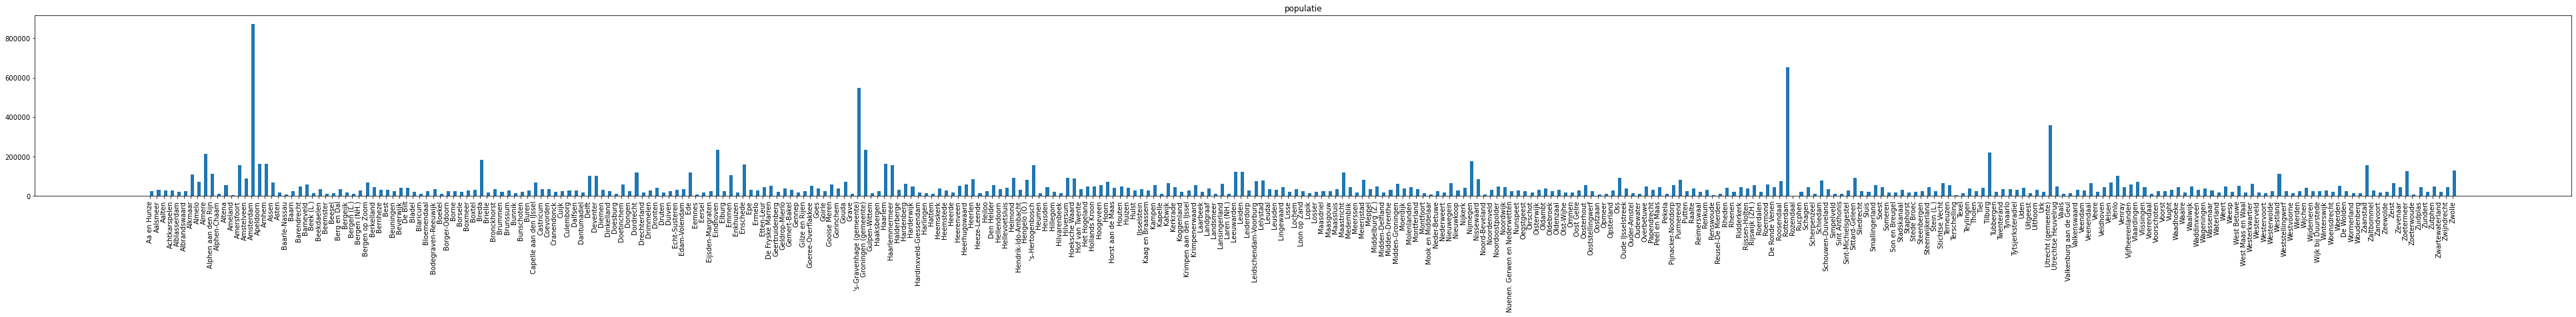

In [17]:
plt.figure(figsize=(150, 5))

plt.subplot(122)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["populatie"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("populatie")

plt.show

ernstige obesitas barplot.

<function matplotlib.pyplot.show(close=None, block=None)>

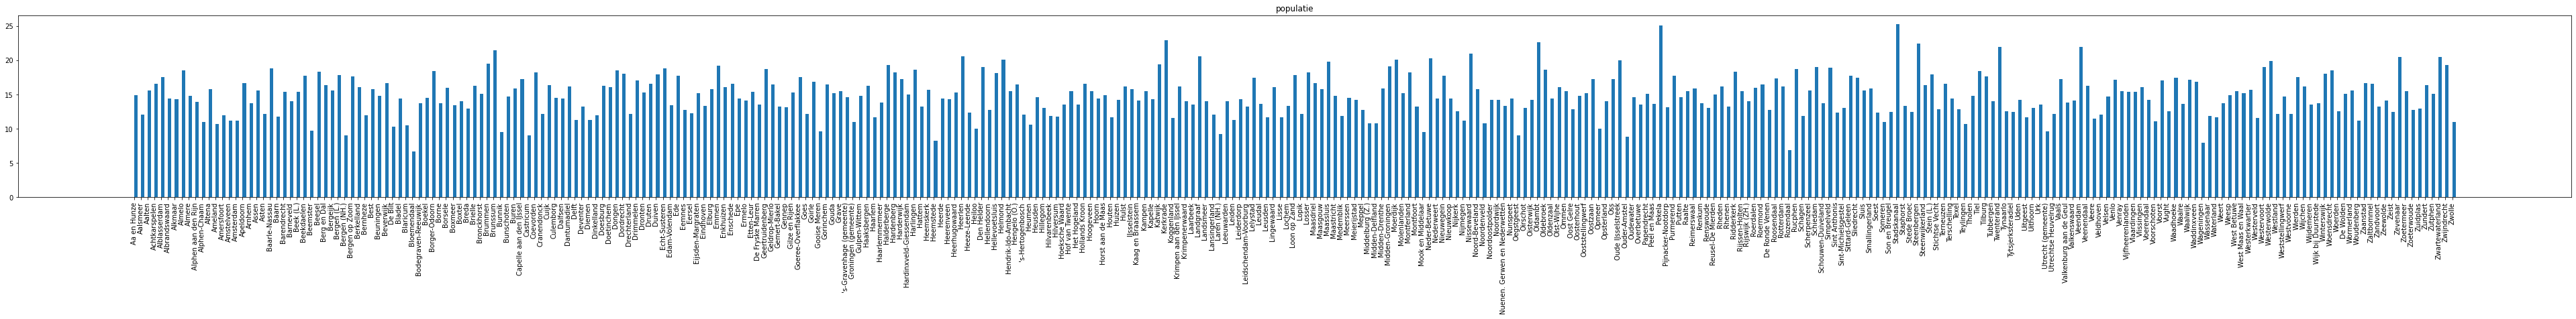

In [18]:
plt.figure(figsize=(150, 5))

plt.subplot(122)
plt.bar(gezondheids_monitor_df["Regio’s"], gezondheids_monitor_df["Ernstig overgewicht (obesitas) (%)"], align='edge', width=0.5)
plt.xticks(gezondheids_monitor_df["Regio’s"], rotation='vertical')
plt.title("populatie")

plt.show

### deel de dataset op in grote en kleine gemeenten

eerst kijken we naar wat het resultaat is als je ze opdeeld in gemeenten met meer dan 10 bars en minder dan 10.

In [19]:
barScore_df = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.n_bars < 11].index)

In [20]:
Nbars_df = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.n_bars > 10].index)

In [21]:
barScore_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_bars,populatie,bar_pop,pop_dichtheid,bar_dhd
Ondergewicht (%),1.000000,0.277910,-0.380168,-0.371439,-0.268890,-0.173478,0.219350,0.079806,0.334269,0.316340,0.161109,0.290820,0.147438
Normaal gewicht (%),0.277910,1.000000,-0.994078,-0.871478,-0.822800,-0.442958,0.333741,0.184188,0.433444,0.422432,0.067797,0.411228,0.060186
Overgewicht (%),-0.380168,-0.994078,1.000000,0.881301,0.822088,0.445870,-0.345808,-0.187028,-0.453061,-0.440901,-0.082725,-0.428350,-0.074949
Matig overgewicht (%),-0.371439,-0.871478,0.881301,1.000000,0.455596,0.239623,-0.250587,-0.060979,-0.486934,-0.508890,0.026545,-0.540994,0.070056
Ernstig overgewicht (obesitas) (%),-0.268890,-0.822800,0.822088,0.455596,1.000000,0.545056,-0.343249,-0.273439,-0.266325,-0.218241,-0.184351,-0.154830,-0.225872
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.173478,-0.442958,0.445870,0.239623,0.545056,1.000000,-0.742309,-0.625348,-0.056457,0.058911,-0.336303,0.101665,-0.254455
Alcoholgebruik/Zware drinker (%),0.219350,0.333741,-0.345808,-0.250587,-0.343249,-0.742309,1.000000,0.799001,0.209805,0.107752,0.516673,-0.050835,0.441065
Alcoholgebruik/Overmatig drinker (%),0.079806,0.184188,-0.187028,-0.060979,-0.273439,-0.625348,0.799001,1.000000,0.025802,-0.091839,0.682969,-0.163317,0.463802
n_bars,0.334269,0.433444,-0.453061,-0.486934,-0.266325,-0.056457,0.209805,0.025802,1.000000,0.934630,0.098142,0.543238,0.171769
populatie,0.316340,0.422432,-0.440901,-0.508890,-0.218241,0.058911,0.107752,-0.091839,0.934630,1.000000,-0.070920,0.598949,0.046697


In [22]:
Nbars_df.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_bars,populatie,bar_pop,pop_dichtheid,bar_dhd
Ondergewicht (%),1.000000,0.205381,-0.323458,-0.333357,-0.223607,0.016526,-0.107578,-0.004880,-0.088454,0.021278,0.045591,0.210187,0.095787
Normaal gewicht (%),0.205381,1.000000,-0.992445,-0.799011,-0.871216,-0.336889,0.042349,0.242106,-0.065397,-0.069938,-0.081263,0.051069,-0.035215
Overgewicht (%),-0.323458,-0.992445,1.000000,0.813681,0.870701,0.323994,-0.027633,-0.232943,0.073935,0.064440,0.073119,-0.075754,0.022169
Matig overgewicht (%),-0.333357,-0.799011,0.813681,1.000000,0.422731,0.112839,0.108748,-0.055557,0.055628,-0.045625,0.066732,-0.158771,0.015328
Ernstig overgewicht (obesitas) (%),-0.223607,-0.871216,0.870701,0.422731,1.000000,0.409623,-0.134518,-0.315743,0.067423,0.138345,0.057628,0.014730,0.022625
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),0.016526,-0.336889,0.323994,0.112839,0.409623,1.000000,-0.699269,-0.648081,-0.023601,0.278741,0.112334,0.316259,0.189423
Alcoholgebruik/Zware drinker (%),-0.107578,0.042349,-0.027633,0.108748,-0.134518,-0.699269,1.000000,0.764092,0.047133,-0.204973,-0.063476,-0.362198,-0.116303
Alcoholgebruik/Overmatig drinker (%),-0.004880,0.242106,-0.232943,-0.055557,-0.315743,-0.648081,0.764092,1.000000,0.060084,-0.204498,-0.063226,-0.271519,-0.071248
n_bars,-0.088454,-0.065397,0.073935,0.055628,0.067423,-0.023601,0.047133,0.060084,1.000000,0.365320,-0.319721,-0.016266,-0.234688
populatie,0.021278,-0.069938,0.064440,-0.045625,0.138345,0.278741,-0.204973,-0.204498,0.365320,1.000000,-0.021654,0.328328,-0.009787


In [23]:
print(sum(barScore_df['populatie']))

8911128


je kan zien dat de correlaties beter worden wanneer je klein van groot schijt.
dit kan komen omdat van grote gemeenten meer data beschikbaar is of omdat kleine gemeenten onvoorspelbaar zijn door de kleine aanwezigheid van bars, wat er voor zorgd dat 0 bars en 3 bars een heel groot verschil veroorzaakt in de pop_bar score.

nu als je ze opdeeld in gemeenten met meer dan 50000 mensen.

In [24]:
barScore_df2 = gezondheids_monitor_df.drop(gezondheids_monitor_df[gezondheids_monitor_df.populatie < 50000].index)

In [25]:
barScore_df2.corr()

,Ondergewicht (%),Normaal gewicht (%),Overgewicht (%),Matig overgewicht (%),Ernstig overgewicht (obesitas) (%),Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),Alcoholgebruik/Zware drinker (%),Alcoholgebruik/Overmatig drinker (%),n_bars,populatie,bar_pop,pop_dichtheid,bar_dhd
Ondergewicht (%),1.000000,0.317322,-0.417443,-0.362664,-0.387793,-0.210932,0.139772,0.106668,0.315479,0.291631,-0.040907,0.287609,-0.040865
Normaal gewicht (%),0.317322,1.000000,-0.994158,-0.906606,-0.877297,-0.519196,0.324291,0.310675,0.374960,0.353759,-0.050053,0.336976,-0.050011
Overgewicht (%),-0.417443,-0.994158,1.000000,0.910377,0.884059,0.519610,-0.325442,-0.309020,-0.393298,-0.370713,0.052591,-0.355814,0.052547
Matig overgewicht (%),-0.362664,-0.906606,0.910377,1.000000,0.611540,0.407723,-0.382208,-0.357401,-0.443455,-0.432263,0.080389,-0.440276,0.080344
Ernstig overgewicht (obesitas) (%),-0.387793,-0.877297,0.884059,0.611540,1.000000,0.530461,-0.188241,-0.185149,-0.250291,-0.220368,0.010127,-0.183190,0.010092
Alcoholgebruik/Voldoet aan richtlijn alcoholgebruik (%),-0.210932,-0.519196,0.519610,0.407723,0.530461,1.000000,-0.696285,-0.665170,-0.143908,-0.062772,-0.046267,0.089943,-0.046306
Alcoholgebruik/Zware drinker (%),0.139772,0.324291,-0.325442,-0.382208,-0.188241,-0.696285,1.000000,0.857129,0.334590,0.280507,-0.043294,-0.029368,-0.043227
Alcoholgebruik/Overmatig drinker (%),0.106668,0.310675,-0.309020,-0.357401,-0.185149,-0.665170,0.857129,1.000000,0.165398,0.088316,-0.056976,-0.061795,-0.056930
n_bars,0.315479,0.374960,-0.393298,-0.443455,-0.250291,-0.143908,0.334590,0.165398,1.000000,0.948113,-0.051161,0.451435,-0.051069
populatie,0.291631,0.353759,-0.370713,-0.432263,-0.220368,-0.062772,0.280507,0.088316,0.948113,1.000000,-0.052219,0.473331,-0.052139


de correlaties zijn beter als je de gemeenten opsplitst in minder en meer dan 10.